In [57]:
import os
from pathlib import Path

from es_sfgtools.data_mgmt.data_handler import DataHandler

pride_path = Path.home() / ".PRIDE_PPPAR_BIN"
os.environ["PATH"] += os.pathsep + str(pride_path)
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib ipympl


In [12]:
main_dir = Path("/Users/gottlieb/data/sfg")
dh = DataHandler(main_dir)

network = "cascadia-gorda"
station = "NCC1"
survey = "2024_A_1126"

dh.change_working_station(network=network, station=station, campaign=survey)



Built directory structure for cascadia-gorda NCC1 2024_A_1126
No date range set for cascadia-gorda, NCC1, 2024_A_1126
Creating TileDB arrays for NCC1
Consolidating existing TileDB arrays for NCC1
Changed working station to cascadia-gorda NCC1 2024_A_1126


In [13]:
print(dates:=dh.kin_position_tdb.get_unique_dates())

['2024-09-21' '2024-09-22' '2024-09-23' '2024-09-24' '2024-09-26'
 '2024-09-30' '2024-10-01' '2024-10-02' '2024-10-03' '2024-10-05'
 '2024-10-06' '2024-10-07' '2024-10-09' '2024-10-11' '2024-10-12']


In [14]:
dates[0]

numpy.datetime64('2024-09-21')

In [51]:
start = dates[2]
end = dates[2]
kin_positions = dh.kin_position_tdb.read_df(start, end)
shotdata = dh.shotdata_tdb_pre.read_df(start)


In [52]:
kin_positions

,time,latitude,longitude,height,east,north,up,number_of_satellites,pdop,wrms
0,2024-09-23 00:00:00.500,41.656274,235.070447,-29.8143,-2.732549e+06,-3.912714e+06,4.217136e+06,11,1.29,3.382666
1,2024-09-23 00:00:02.500,41.656280,235.070439,-28.5357,-2.732550e+06,-3.912714e+06,4.217137e+06,11,1.29,4.393902
2,2024-09-23 00:00:10.500,41.656261,235.070411,-27.7445,-2.732553e+06,-3.912715e+06,4.217136e+06,11,1.29,3.867669
3,2024-09-23 00:00:44.500,41.656191,235.070220,-29.9213,-2.732568e+06,-3.912709e+06,4.217129e+06,11,1.27,4.504102
4,2024-09-23 00:01:11.499,41.656097,235.070093,-27.9606,-2.732581e+06,-3.912709e+06,4.217123e+06,12,1.20,6.979133
...,...,...,...,...,...,...,...,...,...,...
10021,2024-09-23 23:59:11.500,41.659093,235.060822,-28.5206,-2.733087e+06,-3.912086e+06,4.217371e+06,12,1.20,5.517268
10022,2024-09-23 23:59:20.499,41.659128,235.060843,-28.0056,-2.733085e+06,-3.912085e+06,4.217374e+06,12,1.20,7.478697
10023,2024-09-23 23:59:25.500,41.659128,235.060882,-27.6433,-2.733082e+06,-3.912087e+06,4.217374e+06,12,1.20,5.890965
10024,2024-09-23 23:59:27.499,41.659136,235.060896,-28.9727,-2.733080e+06,-3.912086e+06,4.217374e+06,12,1.20,4.895293


In [53]:
shotdata

,pingTime,transponderID,head0,pitch0,roll0,head1,pitch1,roll1,east0,north0,...,east_std1,north_std1,up_std1,returnTime,tt,dbv,xc,snr,tat,isUpdated
0,1.727050e+09,IR5209,253.472588,-2.753416,-1.978644,259.965767,0.584148,2.057784,-2.732552e+06,-3.912715e+06,...,6.299,8.716,18.4,1.727050e+09,1.292181,0,90,38.0,0.20,0
1,1.727050e+09,IR5209,257.566879,4.228953,-9.825532,269.217369,1.112906,-10.693155,-2.732559e+06,-3.912714e+06,...,6.461,9.714,18.4,1.727050e+09,1.290182,0,80,36.0,0.20,0
2,1.727050e+09,IR5209,261.700012,1.489000,-5.722022,257.046822,6.796095,0.478458,-2.732564e+06,-3.912711e+06,...,6.310,8.719,18.4,1.727050e+09,1.290663,0,87,34.0,0.20,0
3,1.727050e+09,IR5209,268.273766,-3.833319,-5.317166,255.750191,0.672265,-3.856687,-2.732570e+06,-3.912709e+06,...,6.312,8.708,18.4,1.727050e+09,1.290828,0,88,37.0,0.20,0
4,1.727050e+09,IR5209,249.832527,4.506808,-9.647501,248.096321,0.639276,2.948189,-2.732578e+06,-3.912709e+06,...,6.301,8.733,18.4,1.727050e+09,1.289981,0,49,36.0,0.20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5548,1.727116e+09,IR5211,337.922441,-1.828889,-7.612756,341.174141,-10.863400,-2.930520,-2.733034e+06,-3.912139e+06,...,10.946,13.389,23.0,1.727116e+09,1.466378,-6,68,20.0,0.44,0
5549,1.727117e+09,IR5211,348.149641,7.906492,0.038847,358.344782,0.327757,2.537372,-2.733050e+06,-3.912143e+06,...,10.138,13.451,20.7,1.727117e+09,1.479199,-34,37,1.0,0.44,0
5550,1.727132e+09,IR5211,126.945122,0.504937,-6.663958,128.651367,-3.538370,3.872822,-2.733070e+06,-3.912104e+06,...,8.412,13.237,27.6,1.727132e+09,1.482692,-29,53,6.0,0.44,0
5551,1.727134e+09,IR5211,74.072571,-6.251173,20.482357,69.541847,4.738519,7.635118,-2.733087e+06,-3.912137e+06,...,8.841,13.362,23.0,1.727134e+09,1.506679,-4,94,21.0,0.44,0


In [61]:
shotdata = shotdata[shotdata.transponderID=="IR5209"]
shotdata.head()

,pingTime,transponderID,head0,pitch0,roll0,head1,pitch1,roll1,east0,north0,...,north_std1,up_std1,returnTime,tt,dbv,xc,snr,tat,isUpdated,returnDT
0,1.727050e+09,IR5209,253.472588,-2.753416,-1.978644,259.965767,0.584148,2.057784,-2.732552e+06,-3.912715e+06,...,8.716,18.4,1.727050e+09,1.292181,0,90,38.0,0.2,0,2024-09-23 00:00:07.492181063
1,1.727050e+09,IR5209,257.566879,4.228953,-9.825532,269.217369,1.112906,-10.693155,-2.732559e+06,-3.912714e+06,...,9.714,18.4,1.727050e+09,1.290182,0,80,36.0,0.2,0,2024-09-23 00:00:22.490181923
2,1.727050e+09,IR5209,261.700012,1.489000,-5.722022,257.046822,6.796095,0.478458,-2.732564e+06,-3.912711e+06,...,8.719,18.4,1.727050e+09,1.290663,0,87,34.0,0.2,0,2024-09-23 00:00:37.490663052
3,1.727050e+09,IR5209,268.273766,-3.833319,-5.317166,255.750191,0.672265,-3.856687,-2.732570e+06,-3.912709e+06,...,8.708,18.4,1.727050e+09,1.290828,0,88,37.0,0.2,0,2024-09-23 00:00:52.490828037
4,1.727050e+09,IR5209,249.832527,4.506808,-9.647501,248.096321,0.639276,2.948189,-2.732578e+06,-3.912709e+06,...,8.733,18.4,1.727050e+09,1.289981,0,49,36.0,0.2,0,2024-09-23 00:01:07.489980936


In [62]:
import datetime

datetime.datetime.fromtimestamp(shotdata['pingTime'].iloc[0] )

datetime.datetime(2024, 9, 22, 17, 0, 6)

In [63]:
shotdata['pingDT'] = pd.to_datetime(shotdata['pingTime'], unit='s')
shotdata['returnDT'] = pd.to_datetime(shotdata['returnTime'], unit='s')

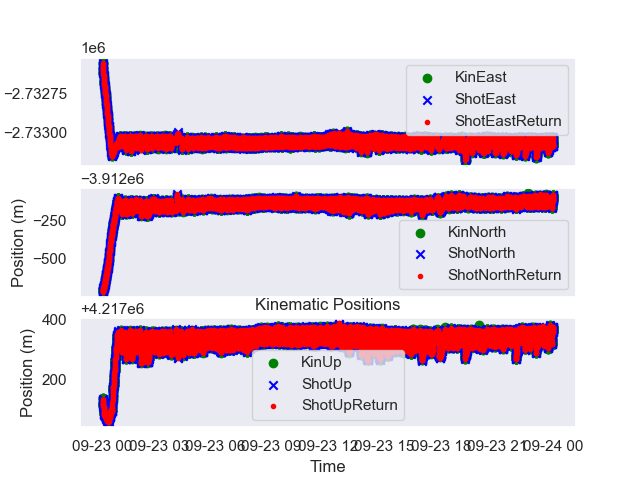

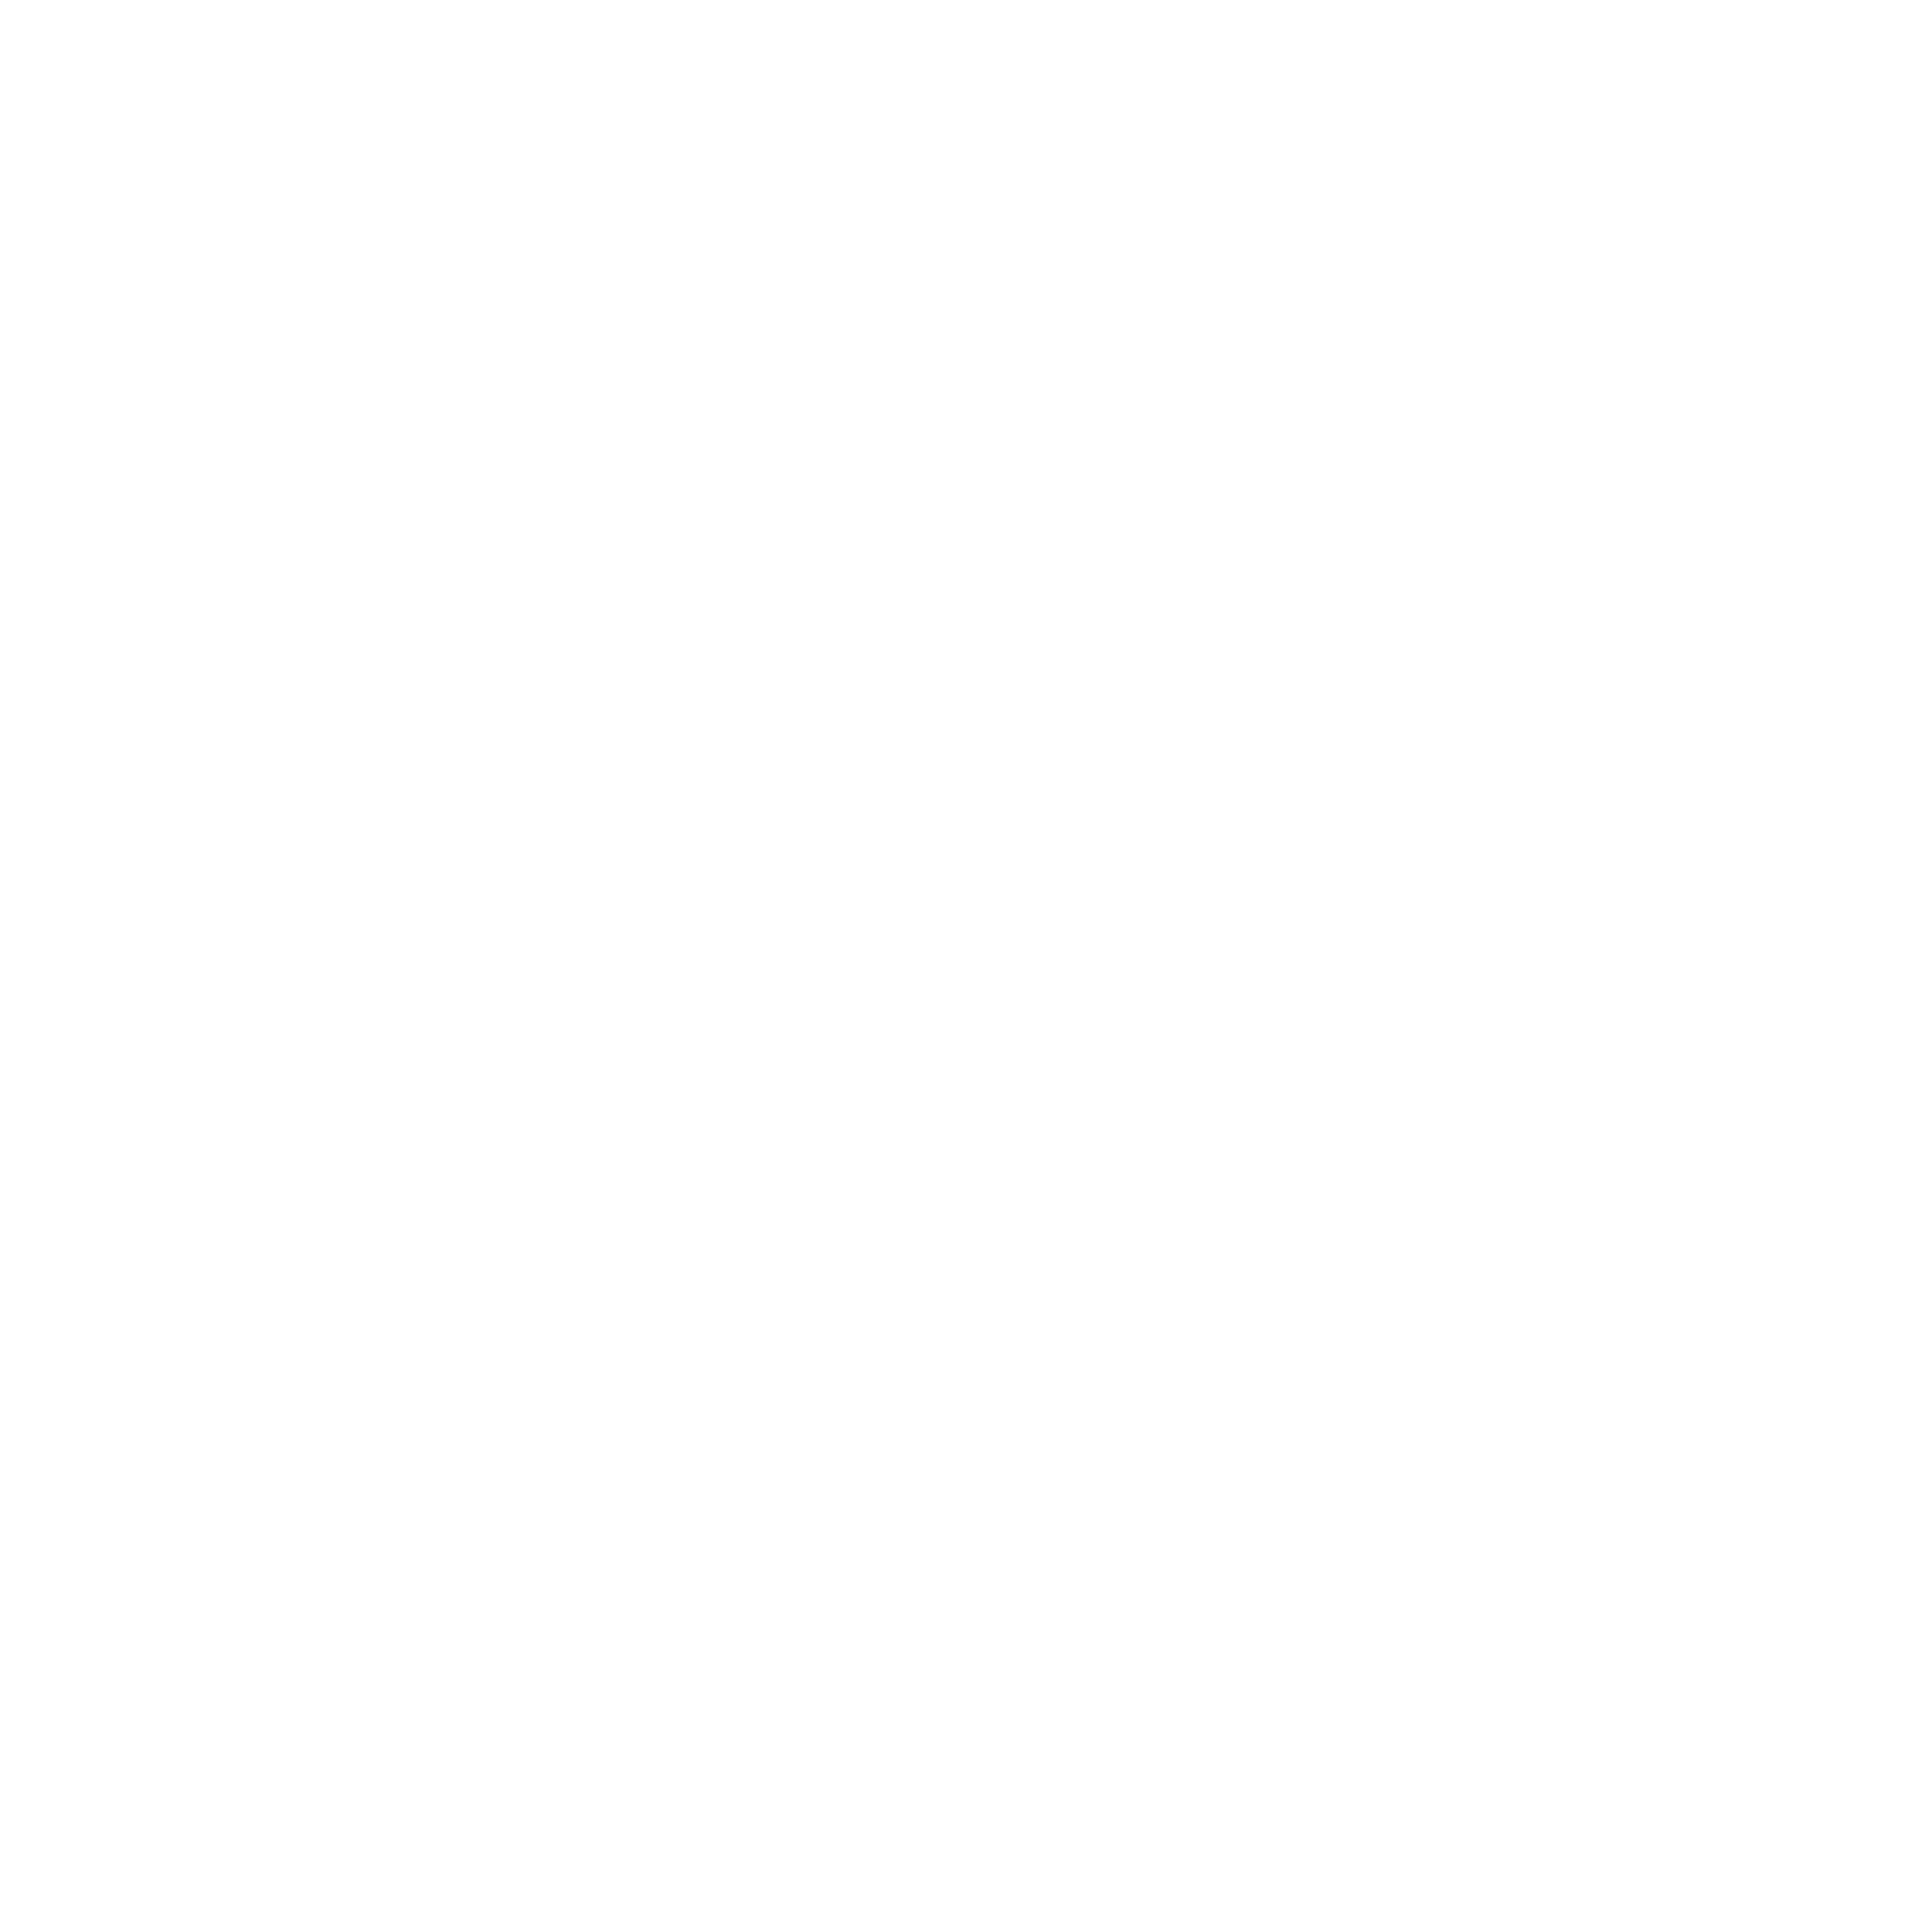

In [64]:

plt.ion()  # Turn on interactive mode
plt.figure(figsize=(16*2, 16*2))
fig,axes = plt.subplots(3,1,sharex=True)

axes[0].scatter(kin_positions['time'], kin_positions["east"], label='KinEast',color='green')
axes[0].scatter(shotdata['pingDT'], shotdata["east0"], label='ShotEast',color='blue',marker='x')
axes[0].scatter(shotdata['returnDT'], shotdata["east1"], label='ShotEastReturn',color='red',marker='.')
axes[0].set_ylabel('Position (m)')
axes[0].legend()
axes[0].grid()

axes[1].scatter(kin_positions['time'], kin_positions["north"], label='KinNorth',color='green')
axes[1].scatter(shotdata['pingDT'], shotdata["north0"], label='ShotNorth',color='blue',marker='x')
axes[1].scatter(shotdata['returnDT'], shotdata["north1"], label='ShotNorthReturn',color='red',marker='.')
axes[1].set_ylabel('Position (m)')
axes[1].legend()
axes[1].grid()

axes[2].scatter(kin_positions['time'], kin_positions["up"], label='KinUp',color='green')
axes[2].scatter(shotdata['pingDT'], shotdata["up0"], label='ShotUp',color='blue',marker='x')
axes[2].scatter(shotdata['returnDT'], shotdata["up1"], label='ShotUpReturn',color='red',marker='.')
axes[2].set_xlabel('Time')
axes[2].set_ylabel('Position (m)')
axes[2].legend()
axes[2].grid()

plt.title('Kinematic Positions')
plt.show()